# Visualizing twitter sentiment of politicans
---

# 1. Installs and imports

## 1.1 Install

In [1]:
# Install req modules
#!pip3 install -r ../requirements.txt

## 1.2. Import

In [2]:
import pandas as pd

pd.set_option('mode.chained_assignment',None)

from datetime import datetime

import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', titlesize=12)

---

# 2. Load sentiment perdicitions


In [3]:
sentiment = pd.read_csv('./data/Final_Predictions.csv')

In [4]:
sentiment.head()

,Unnamed: 0,mp,tweet_date,tweet_time,tweet_text,cleaned_tweet,Snowball_Stem,NB_predictions,LSTM_predictions,BLSTM_predictions,SVM_predictions,Ensemble_predictions
0,0,rsprasad,2021-03-31,23:30:00,"Please, don't break the trust.\n\n@narendramod...",please break trust,pleas break trust,0,1,0,1,1
1,1,rsprasad,2021-03-31,23:30:00,"MAINTENANCE OF WIVES, CHILDREN AND PARENTS - h...",maintenance wives children parents l c h r read,mainten wive children parent l c h r read,0,0,0,1,0
2,2,rsprasad,2021-03-31,23:30:00,NIA look into SSR case \n\n@AmitShah @narendra...,nia look ssr case,nia look ssr case,1,1,1,1,1
3,3,rsprasad,2021-03-31,23:30:00,@PavanjitMane1 @PMOIndia @CMOMaharashtra @rspr...,new pan allotted per aadhar many pans issued b...,new pan allot per aadhar mani pan issu bef aad...,1,1,1,1,1
4,4,rsprasad,2021-03-31,23:30:00,@rsprasad @narendramodi @PMOIndia @examwarrior...,one worst govt till interest reduced income ta...,one worst govt till interest reduc incom tax c...,0,0,0,0,0


In [5]:
sentiment = sentiment[['mp', 'tweet_date', 'tweet_time', 'Ensemble_predictions']]

In [6]:
sentiment.head()

,mp,tweet_date,tweet_time,Ensemble_predictions
0,rsprasad,2021-03-31,23:30:00,1
1,rsprasad,2021-03-31,23:30:00,0
2,rsprasad,2021-03-31,23:30:00,1
3,rsprasad,2021-03-31,23:30:00,1
4,rsprasad,2021-03-31,23:30:00,0


---

# 3. All politicians in dataset

In [7]:
for politician in sentiment.mp.unique():
    print(politician)

rsprasad
myogiadityanath
OfficeofUT
rahulgandhi
CMOTamilNadu
ArvindKejriwal
smritiirani
PiyushGoyalOffc
AmitShah
nsitharaman
narendramodi
rajnathsingh
Dev_Fadnavis
mamataofficial
NitishKumar
nitin_gadkari
DrSJaishankar


---

# 4. Overall sentiment in the dataset 
`Across all politicians`

In [8]:
total_sentiment = sentiment.Ensemble_predictions.value_counts()
sentiment.Ensemble_predictions.value_counts()

1    19208
0    15190
Name: Ensemble_predictions, dtype: int64

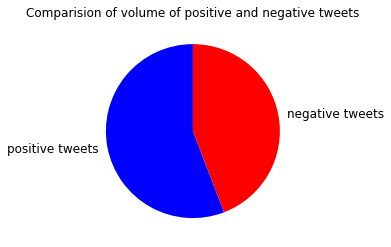

In [9]:
labels = ['positive tweets', 'negative tweets']
total_sentiment_pie = plt.pie(total_sentiment, labels=labels, colors=("b", "r"), startangle = 90)
plt.title('Comparision of volume of positive and negative tweets')
plt.show()

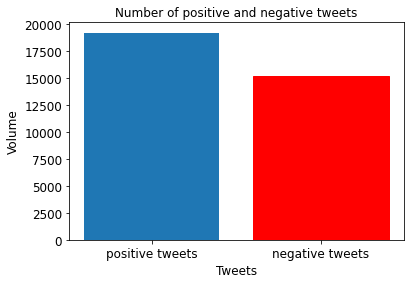

In [10]:
total_sentiment_bar = plt.bar(labels, total_sentiment)
total_sentiment_bar[1].set_color('r')
plt.xlabel("Tweets")
plt.ylabel("Volume")
plt.title('Number of positive and negative tweets')
plt.show()

- There are marginally more negative than positive tweets in the dataset of collected tweets

---

# 5. Overall tweets sentiment in dataset across time
`Across all politicians`

In [11]:
for politician in sentiment.tweet_date.unique():
    print(politician)

2021-03-31
2021-03-30
2021-03-29
2021-03-28
2021-03-27


- Dates for which tweets were collected

In [12]:
dates = sentiment.tweet_date.unique()[::-1]

In [13]:
positive_tweets = []
negative_tweets = []
percentage_positive = []
percentage_negative = []
volume = []

for date in dates:
#     print(date)
    df = sentiment[sentiment.tweet_date == date]
    sentiment_values = df.Ensemble_predictions.value_counts()
    positive_tweets.append(sentiment_values[1])
    negative_tweets.append(sentiment_values[0])
    percentage_positive.append((sentiment_values[1] / (sentiment_values[0] + sentiment_values[1]))*100)
    percentage_negative.append((sentiment_values[0] / (sentiment_values[0] + sentiment_values[1]))*100)
    volume.append(sentiment_values[0] + sentiment_values[1])
#     print('positive tweets: ', positive_tweets)
#     print('negative tweets: ', negative_tweets)
#     print('percentage posistive: ', percentage_positive)
#     print('volume: ', volume)
#     print(df.head())

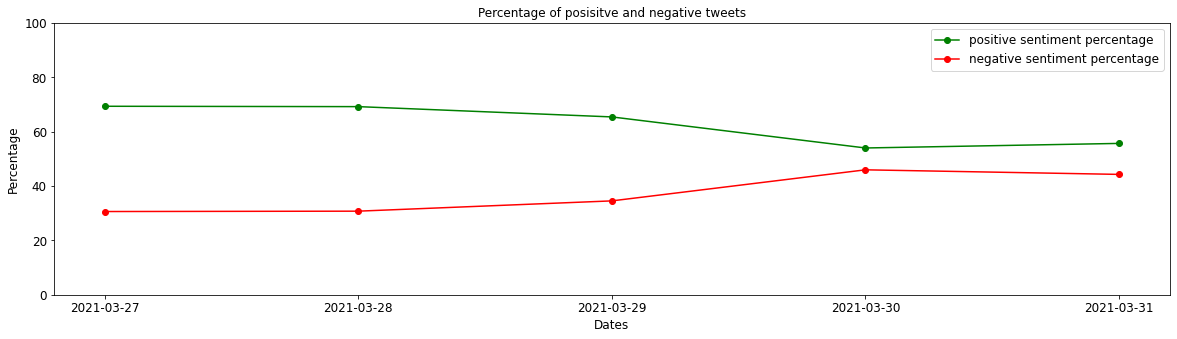

In [14]:
fig = plt.figure(figsize=(20, 5))
plt.ylim(0, 100)
plt.plot(dates, percentage_positive, label='positive sentiment percentage', marker='o', color='g')
plt.plot(dates, percentage_negative, label='negative sentiment percentage', marker='o', color='r')
plt.xlabel("Dates")
plt.ylabel("Percentage")
plt.title('Percentage of posisitve and negative tweets')
plt.legend()
plt.show()

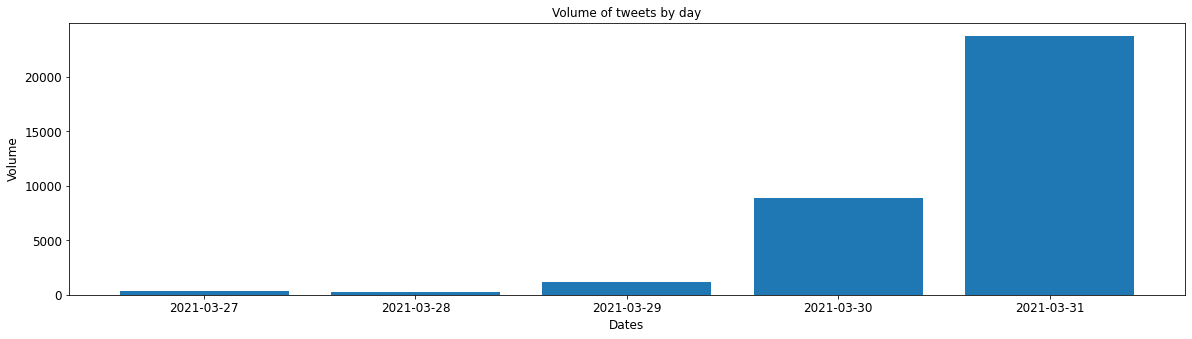

In [15]:
fig = plt.figure(figsize=(20, 5))
plt.bar(dates, volume)
plt.xlabel("Dates")
plt.ylabel("Volume")
plt.title('Volume of tweets by day')
plt.show()

Text(0.5, 1.0, '')

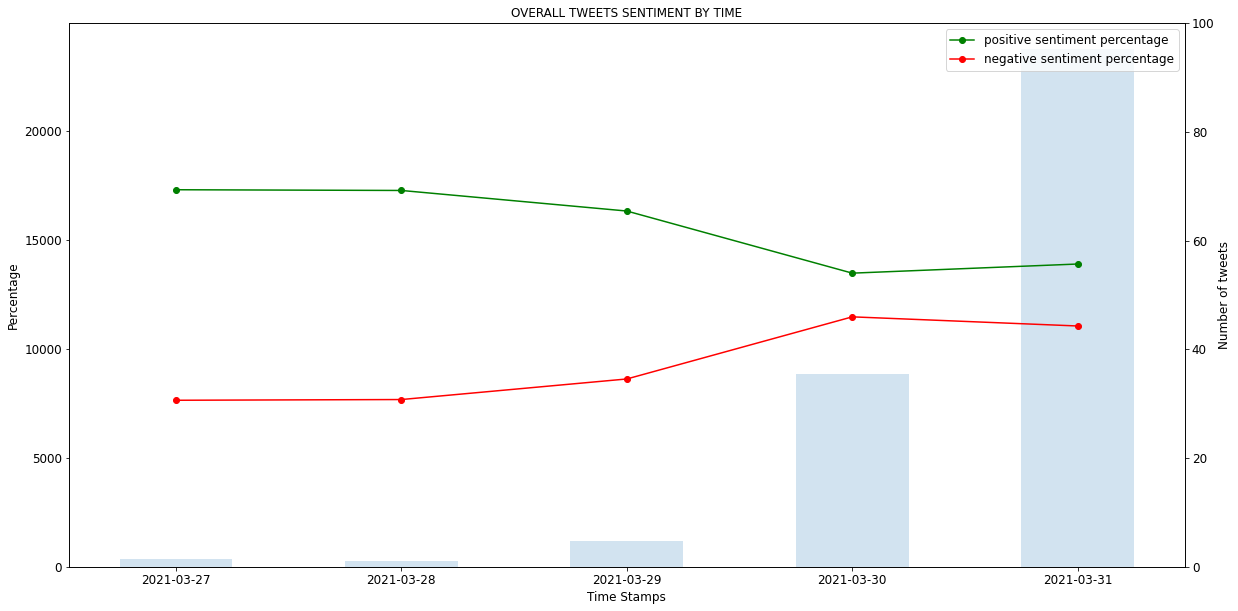

In [16]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()  # set up the 2nd axis
    
ax2.set_xlabel("Time")
ax2.set_ylabel("Percentage")
ax2.set_title(f'Overall Sentiment and volume over time')
    
ax2.plot(dates, percentage_positive, label='positive sentiment percentage', marker = 'o', color='g')
ax2.plot(dates, percentage_negative, label='negative sentiment percentage', marker='o', color='r')
ax2.set_ylim(0, 100)
    
ax1.set_xlabel("Time Stamps")
ax1.set_ylabel("Number of tweets")
ax1.set_title(f'OVERALL TWEETS SENTIMENT BY TIME')
# ax1.set_ylim(0, 100)
ax1.bar(dates, volume, width=0.5, alpha=0.2)
ax1.grid(b=False)

ax2.legend()
plt.title("")


---

# 6. Sentiment by politician

In [17]:
politicians = sentiment.mp.unique()
politicians

array(['rsprasad', 'myogiadityanath', 'OfficeofUT', 'rahulgandhi',
       'CMOTamilNadu', 'ArvindKejriwal', 'smritiirani', 'PiyushGoyalOffc',
       'AmitShah', 'nsitharaman', 'narendramodi', 'rajnathsingh',
       'Dev_Fadnavis', 'mamataofficial', 'NitishKumar', 'nitin_gadkari',
       'DrSJaishankar'], dtype=object)

In [18]:
def draw_graphs(politician):
    
#     print(politician)
    
    # Initialize arrays
    positive_tweets = []
    negative_tweets = []
    percentage_positive = []
    percentage_negative = []
    volume = []
    
    df = sentiment[sentiment.mp == politician]
    date = df.tweet_date
    time = df.tweet_time
    df['time'] = list(map(lambda x, y: datetime.strptime(x + ' ' + y, '%Y-%m-%d %H:%M:%S'), date, time))
    df = df[['mp', 'time', 'Ensemble_predictions']]
    
    total_sentiment_values = df.Ensemble_predictions.value_counts()
    
#     print(df.head())
    
    time_stamps = df.time.unique()[::-1]
    
#     print(time_stamps)
    
    for time_stamp in time_stamps:
        time_stamp_df = df[df.time == time_stamp]
#         print(time_stamp_df.head())
        sentiment_values = time_stamp_df.Ensemble_predictions.value_counts()
#         print(sentiment_values)
        
        sent_val = {"0":0, "1":0}
        
        try:
            sent_val["0"] = sentiment_values[0]
        except KeyError as err:
            sent_val["0"] = 0
        
        try:
            sent_val["1"] = sentiment_values[1]
        except KeyError as err:
            sent_val["1"] = 0
        
#         print(sent_val)
        positive_tweets.append(sent_val["1"])
        negative_tweets.append(sent_val["0"])
        percentage_positive.append((sent_val["1"] / (sent_val["0"] + sent_val["1"]))*100)
        percentage_negative.append((sent_val["0"] / (sent_val["0"] + sent_val["1"]))*100)
        volume.append(sent_val["0"] + sent_val["1"])
        
#         print('positive tweets: ', positive_tweets)
#         print('negative tweets: ', negative_tweets)
#         print('percentage posistive: ', percentage_positive)
#         print('volume: ', volume)

    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax2 = ax1.twinx()
    
    ax2.set_xlabel("Time Stamps")
    ax2.set_ylabel("Number of tweets")
    ax2.set_title(f'{politician.upper()} TWEETS BY TIME')
    
    ax2.plot(time_stamps, percentage_positive, label='positive sentiment percentage', marker = 'o', color='g')
    ax2.plot(time_stamps, percentage_negative, label='negative sentiment percentage', marker='o', color='r')
    ax2.set_ylim(0, 100)
    
    ax1.set_xlabel("Time Stamps")
    ax1.set_ylabel("Percentage")
    ax1.set_title(f'{politician.upper()} TWEETS BY TIME')
    ax1.set_ylim(0, 100)
    ax1.bar(time_stamps, volume, width=0.01, alpha=0.2)
    ax1.grid(b=False)
    ax2.legend()
    
    fig = plt.figure(figsize=(20, 5))
    
    ax1 = plt.subplot2grid((1,2),(0,0))
    labels = ['positive tweets', 'negative tweets']
    plt.pie(total_sentiment_values, colors=("b","r"), labels=labels, startangle = 90)
    plt.title(f'{politician.upper()} Overall tweet sentiment')
    
    ax2 = plt.subplot2grid((1,2), (0, 1))
    total_sentiment_bar = plt.bar(labels, total_sentiment_values)
    total_sentiment_bar[1].set_color('r')
    ax2.set_ylim(0, 1500)
    plt.xlabel("Tweets")
    plt.ylabel("Volume")
    plt.title('Number of posisitve and negative tweets')


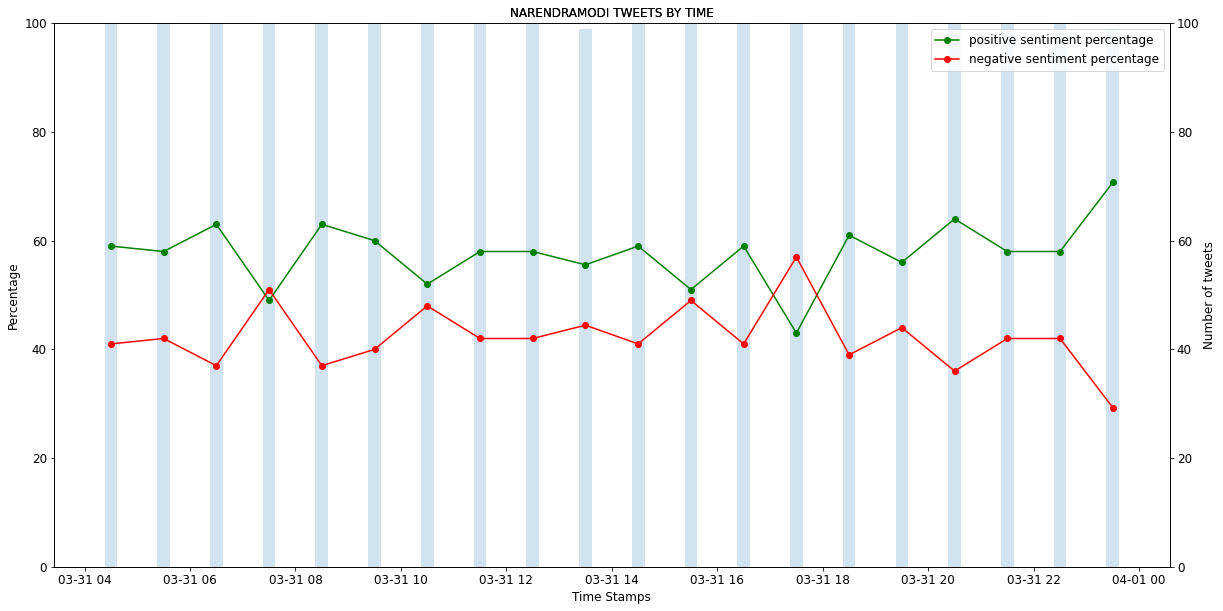

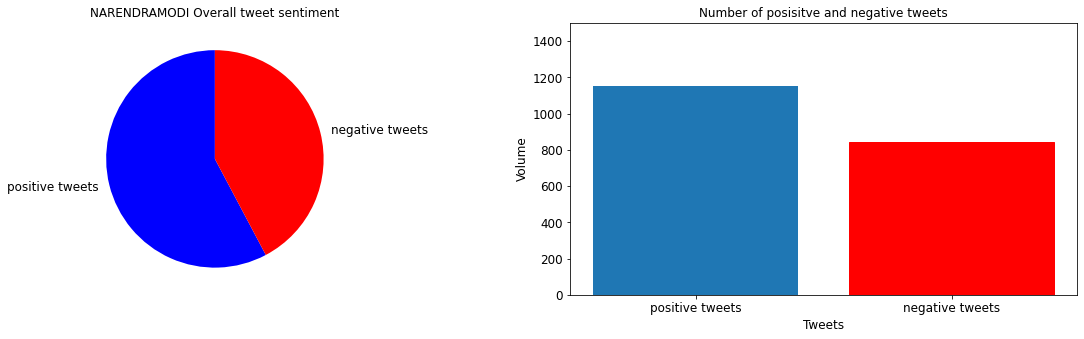

In [19]:
draw_graphs('narendramodi')

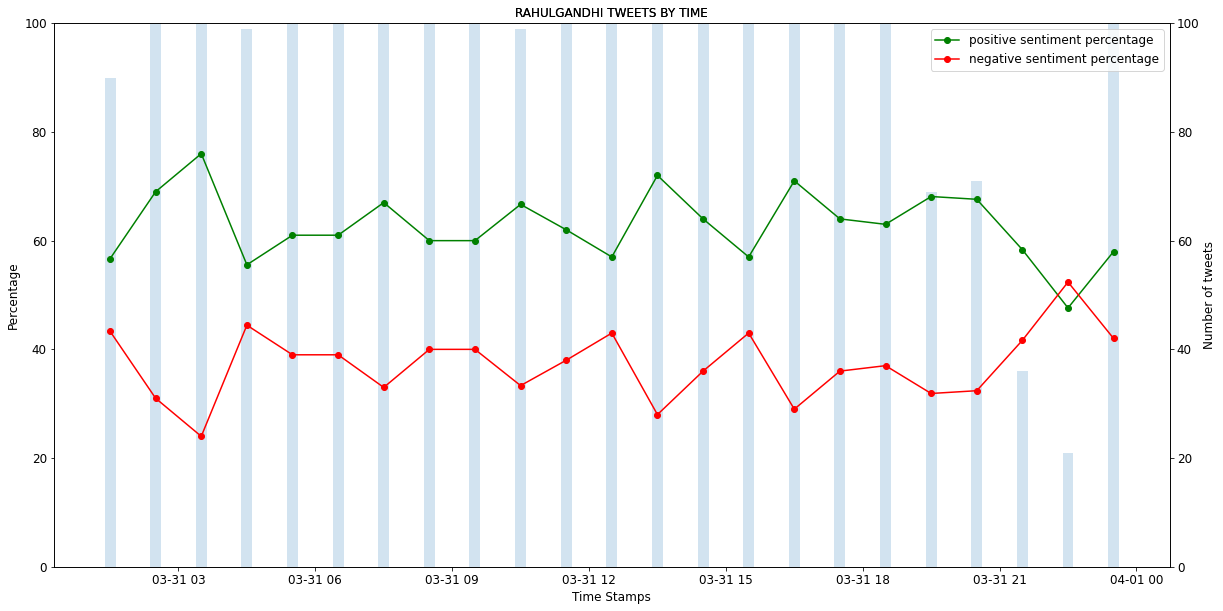

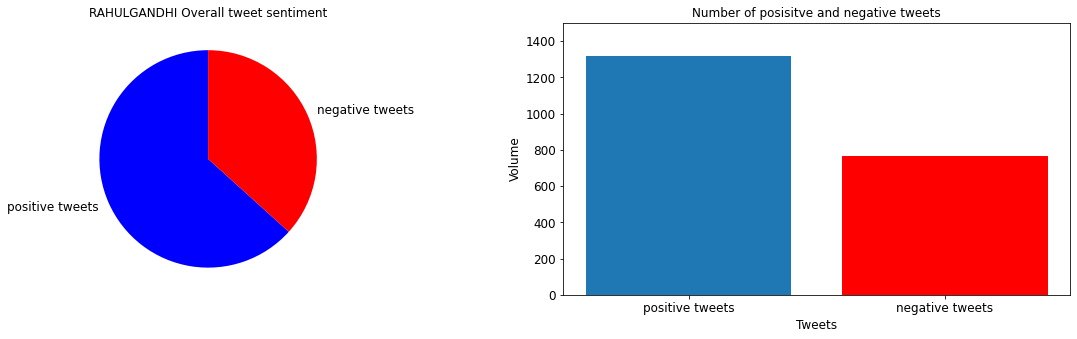

In [20]:
draw_graphs('rahulgandhi')

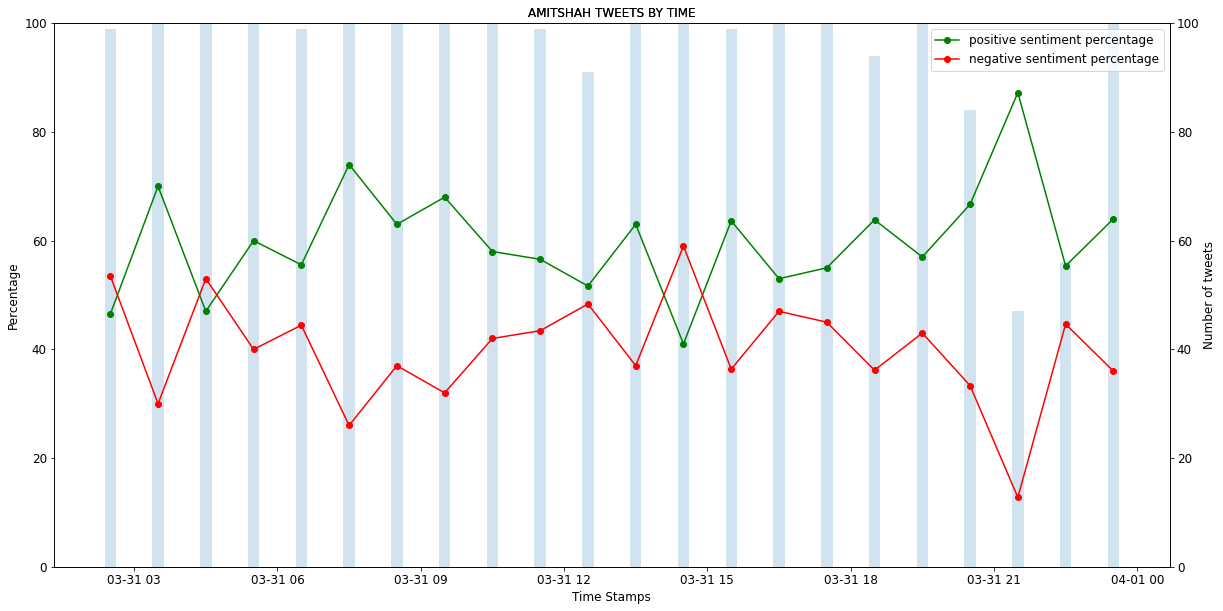

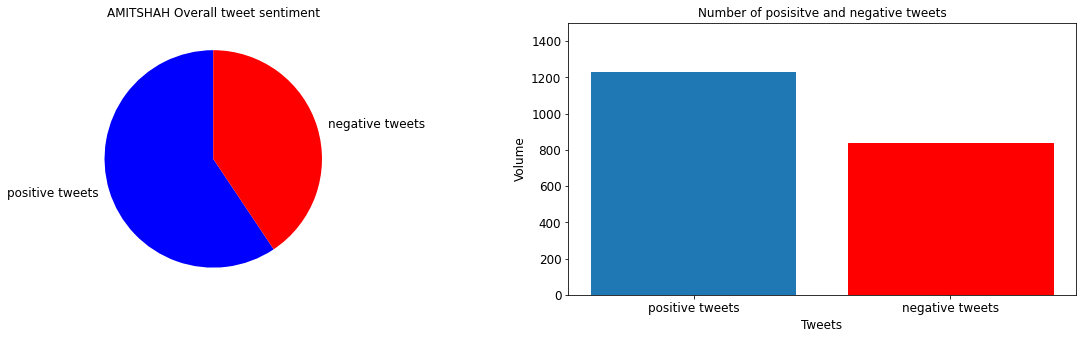

In [21]:
draw_graphs('AmitShah')

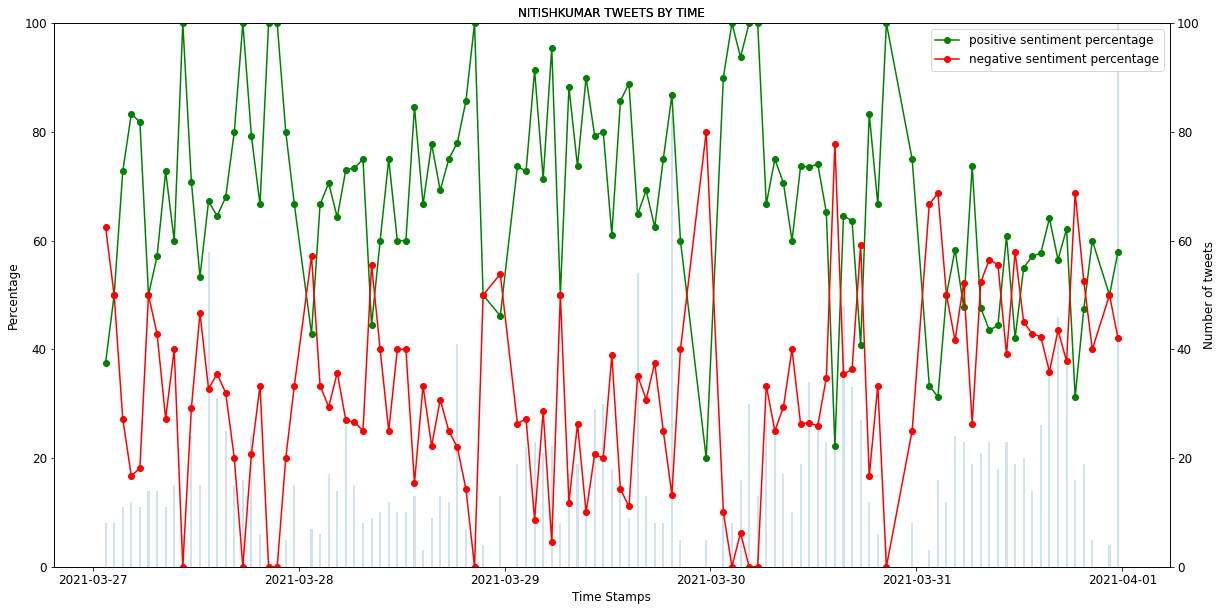

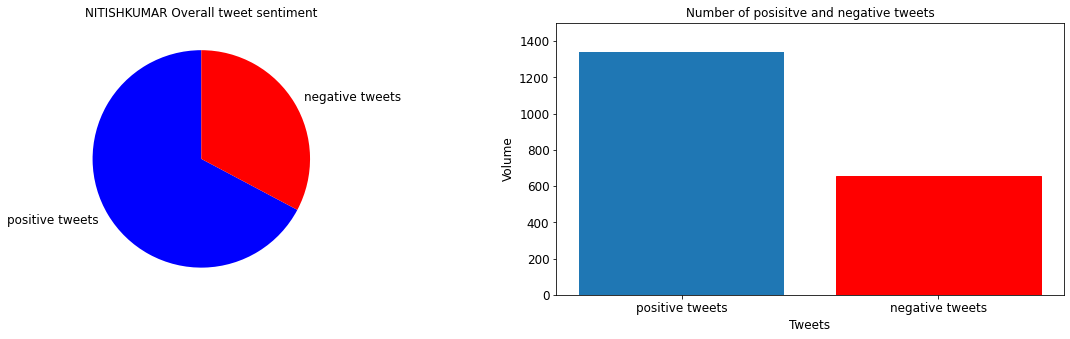

In [22]:
draw_graphs('NitishKumar')

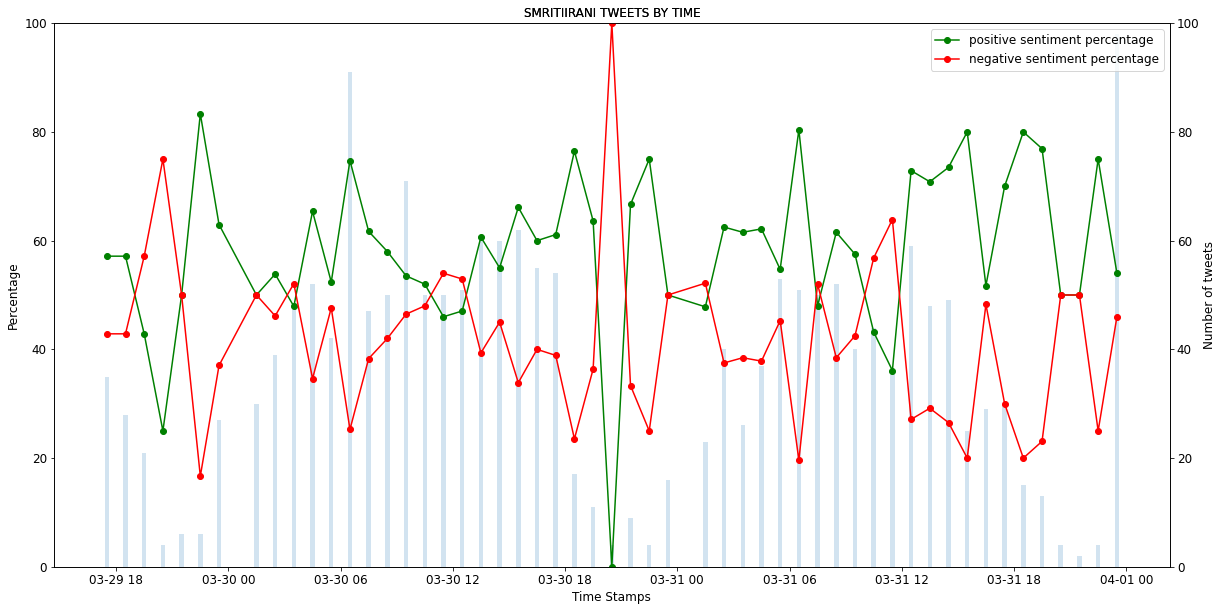

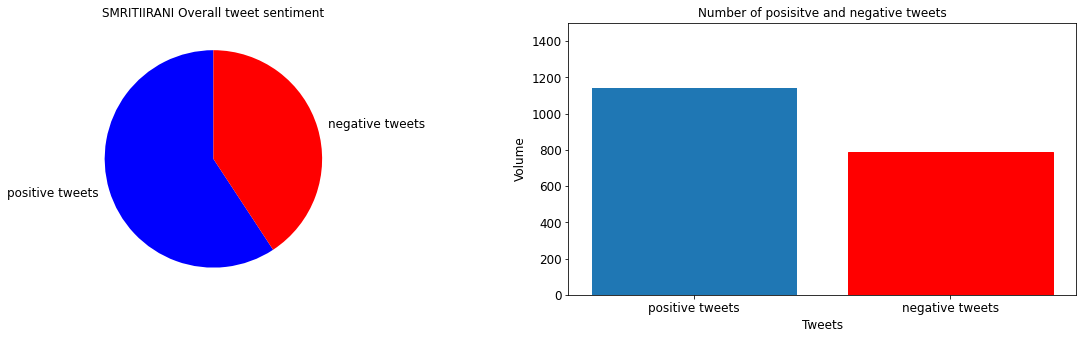

In [23]:
draw_graphs('smritiirani')

- Lesser number of tweets increases the polarity

<ipython-input-18-252a36bd3ac2>:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize=(20, 10))


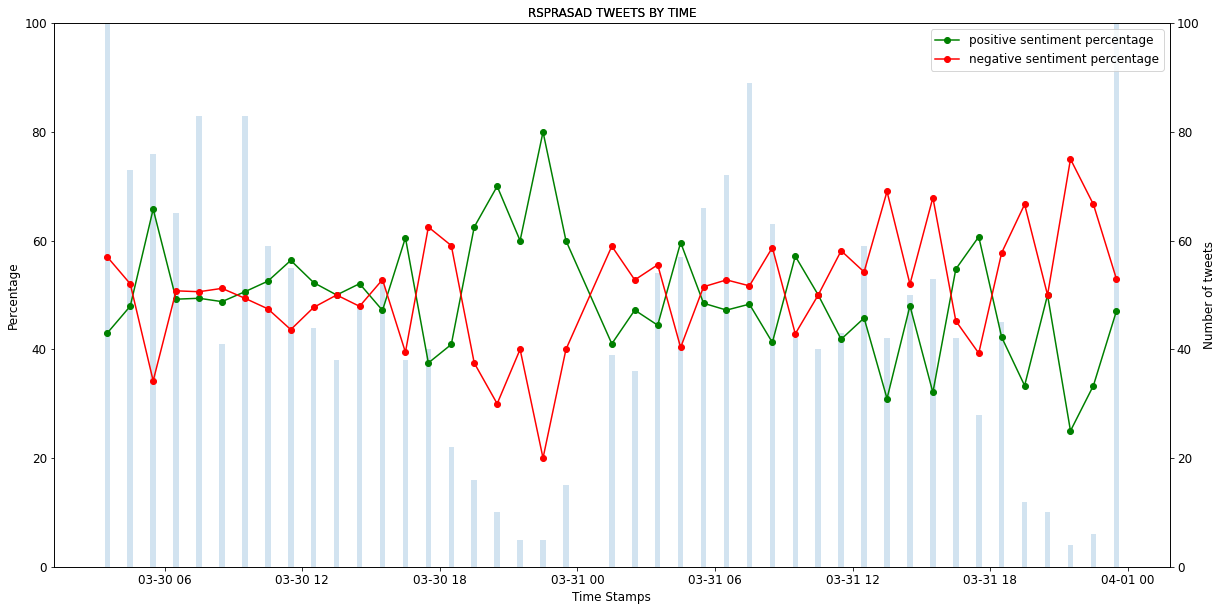

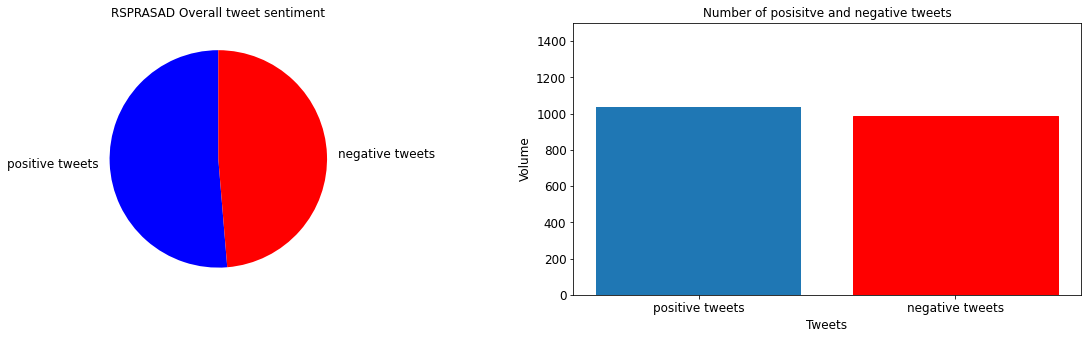

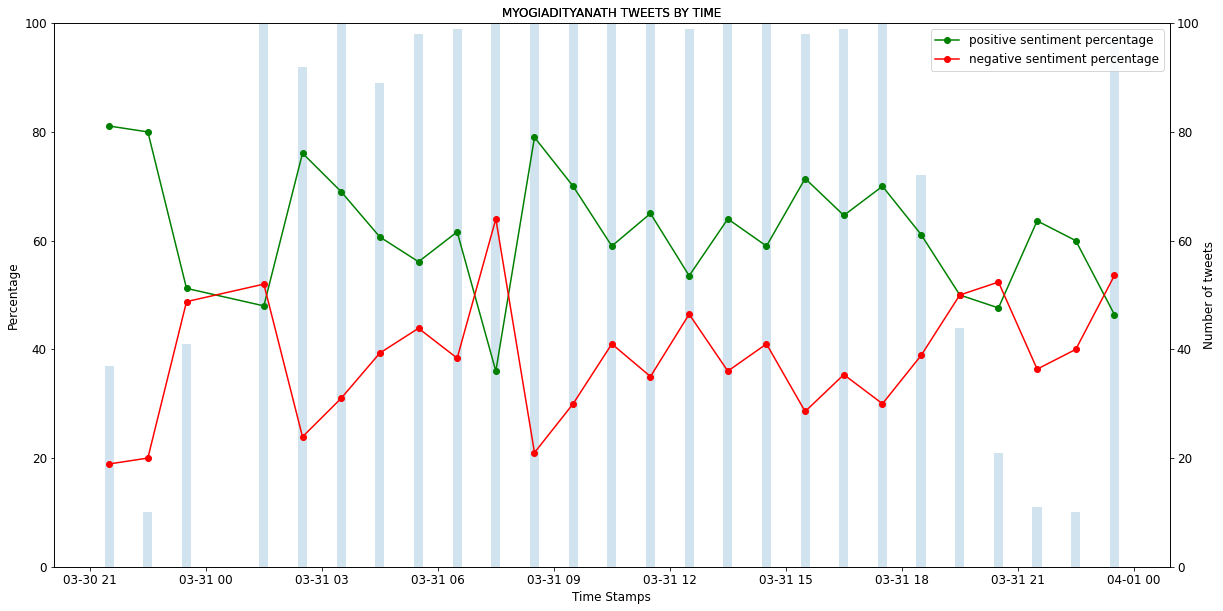

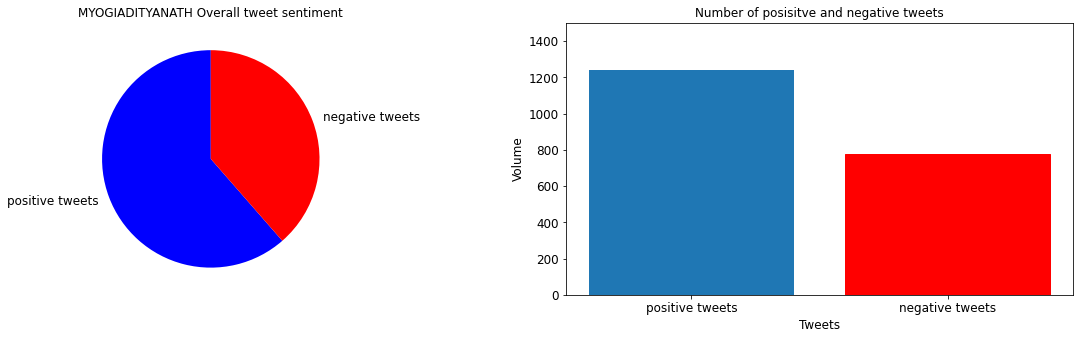

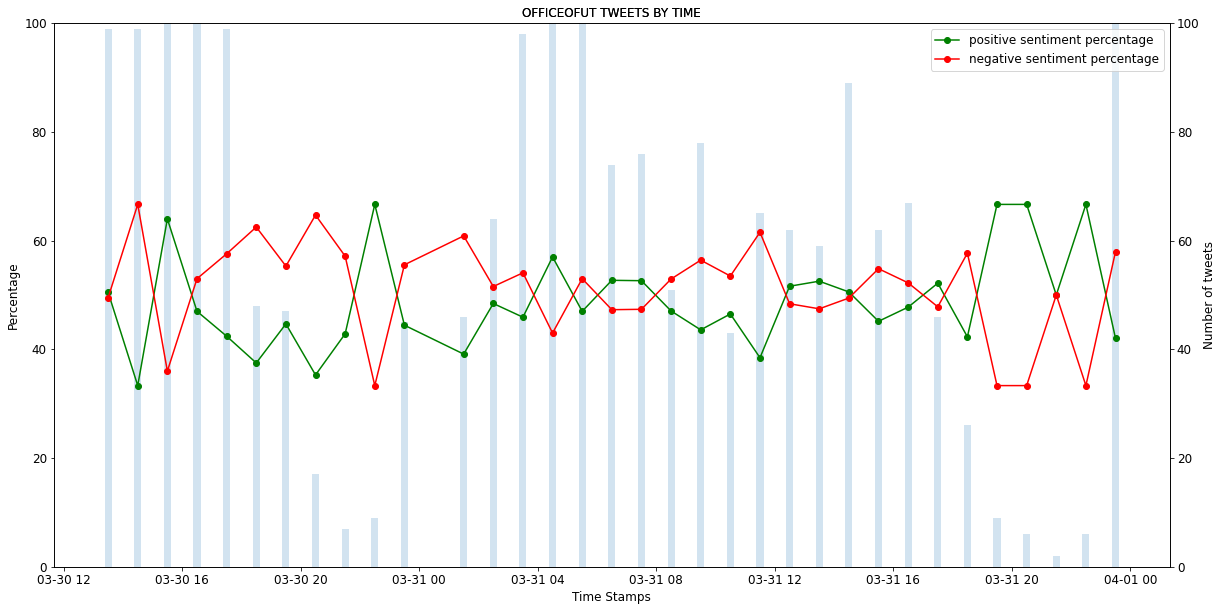

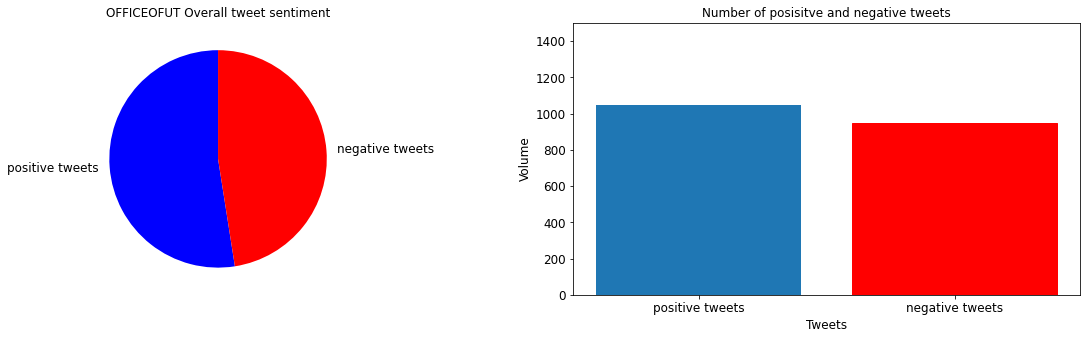

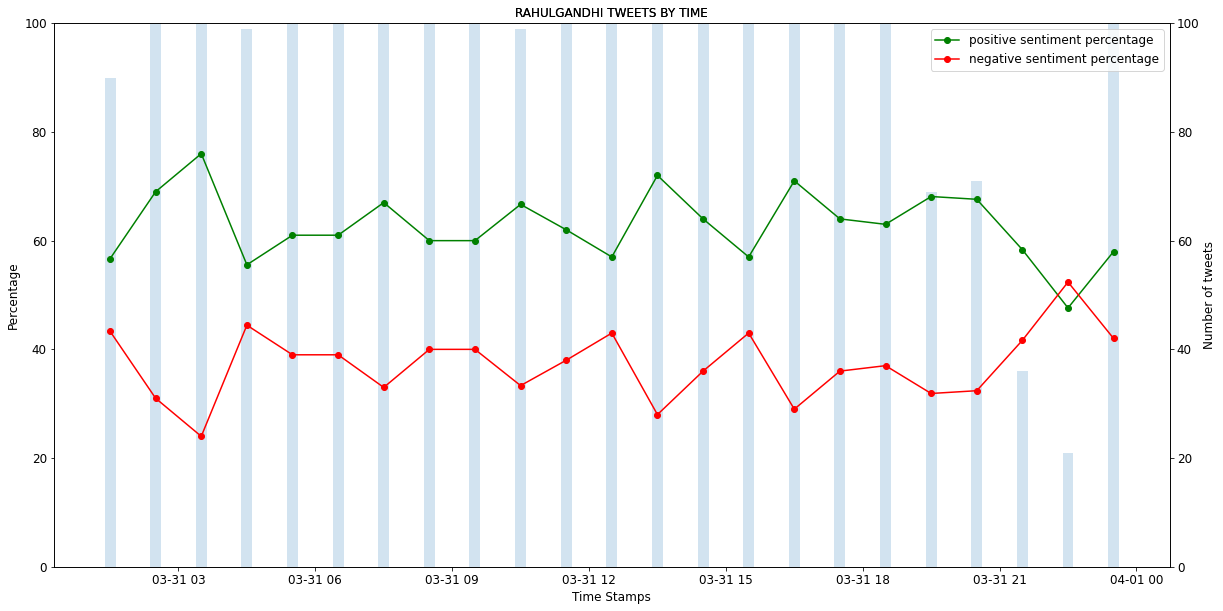

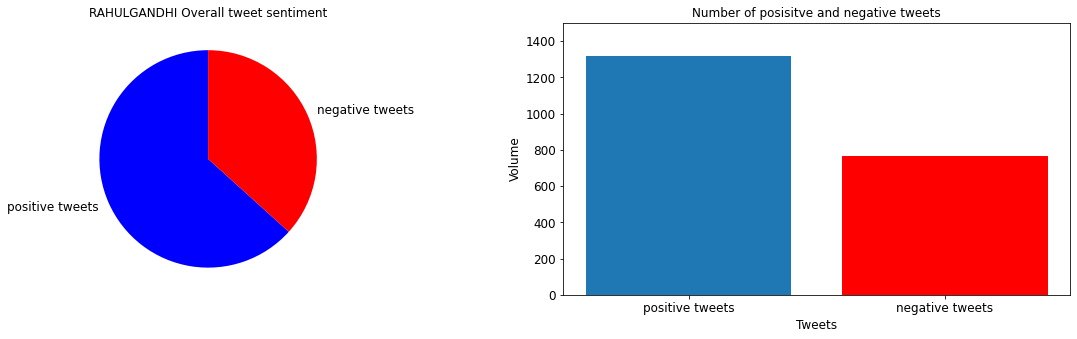

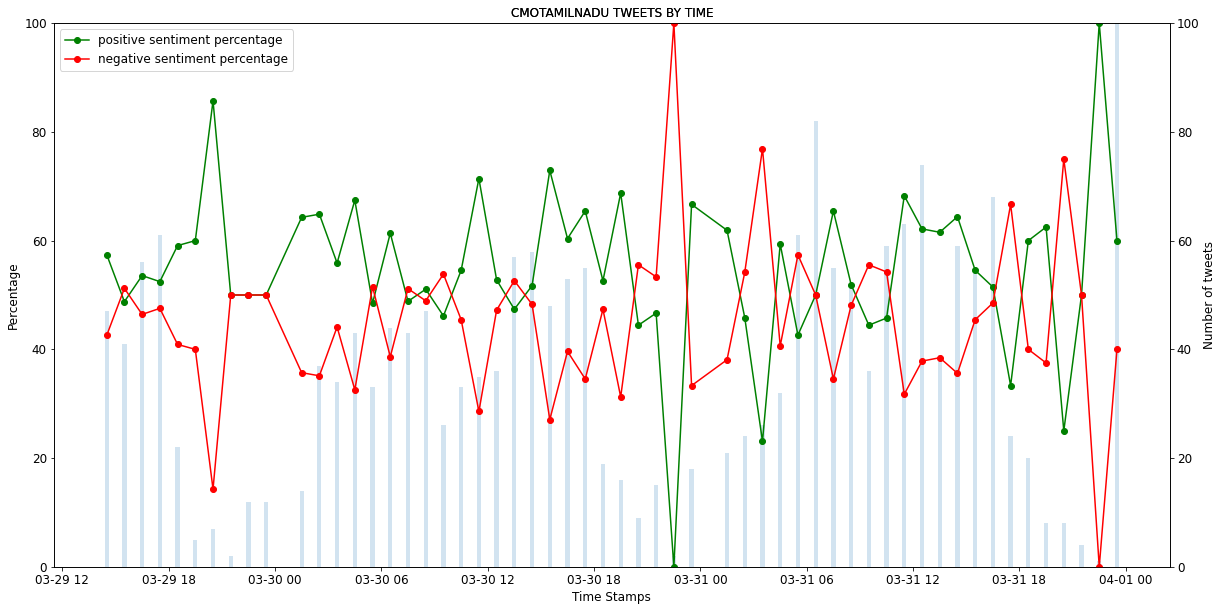

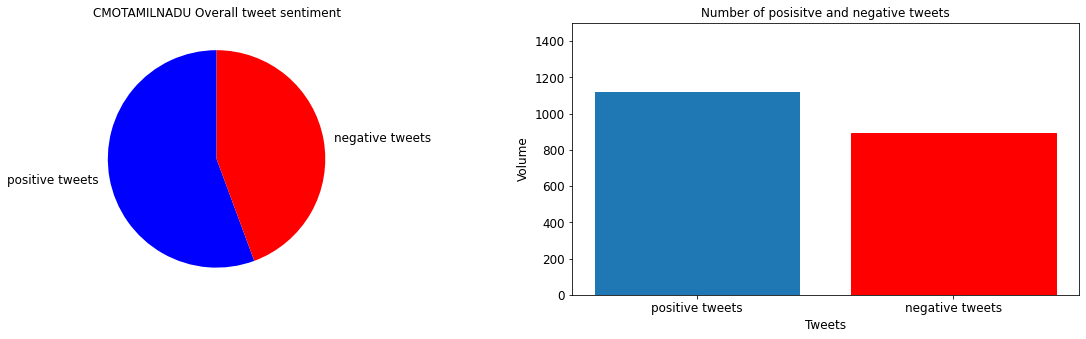

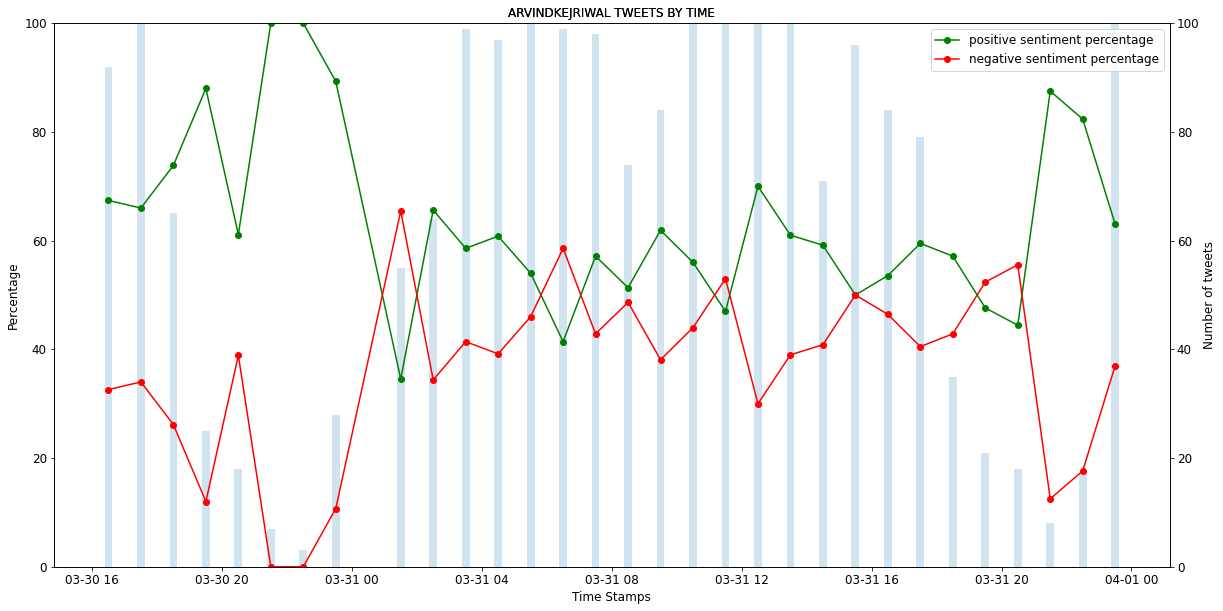

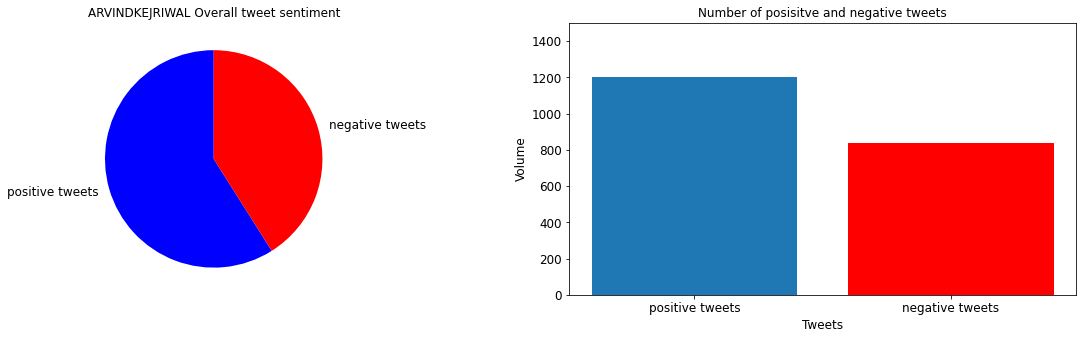

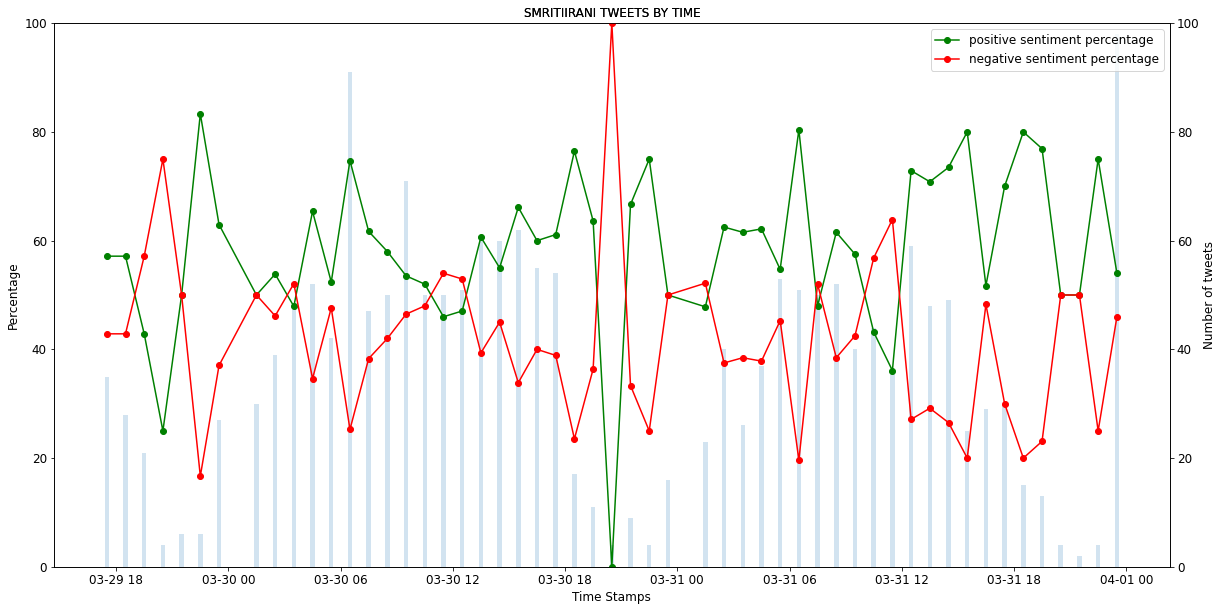

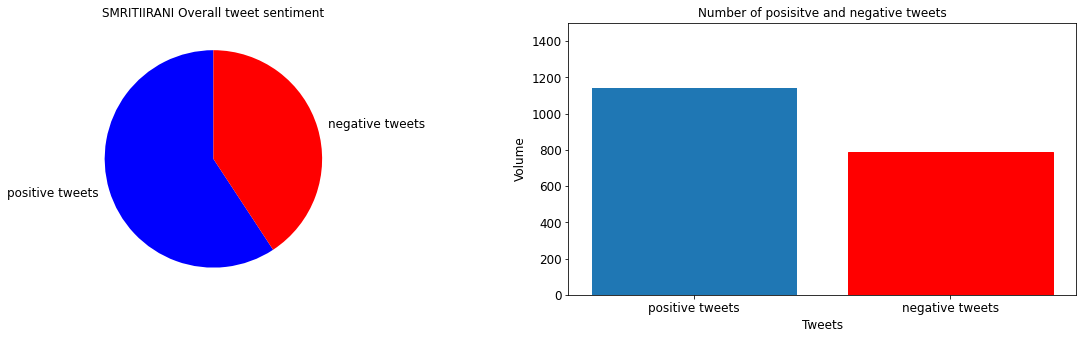

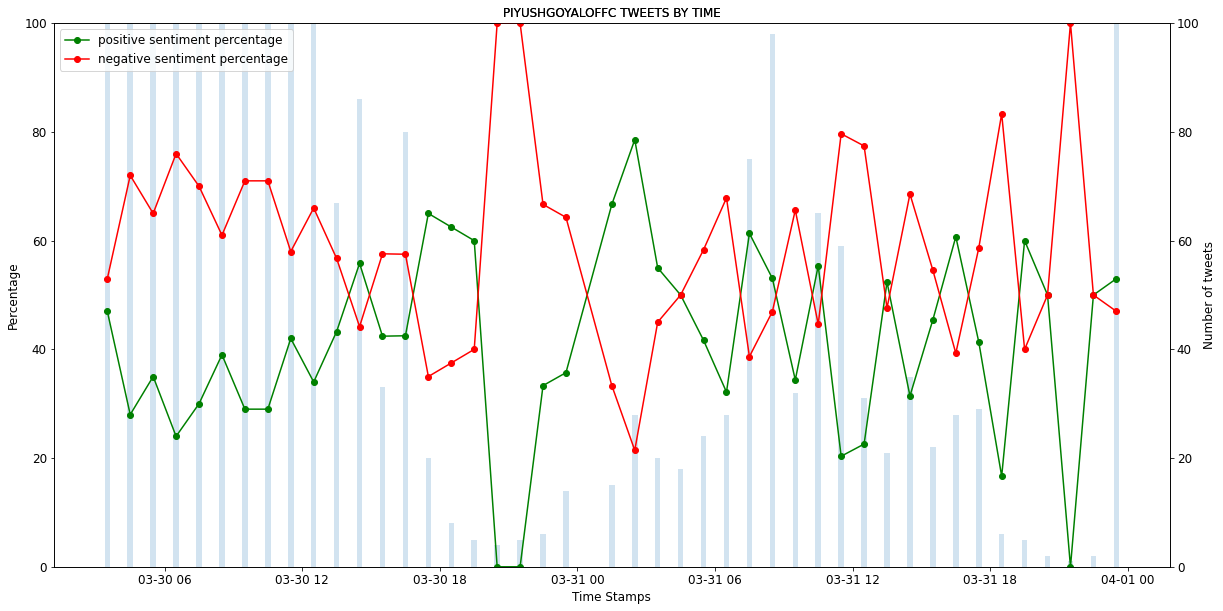

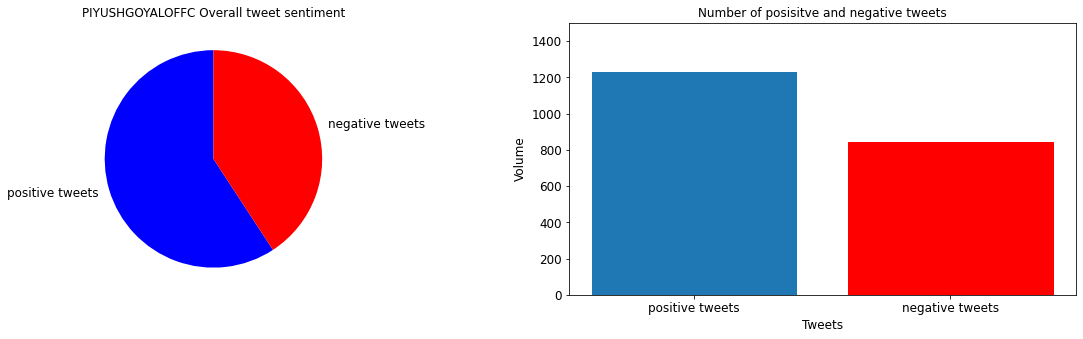

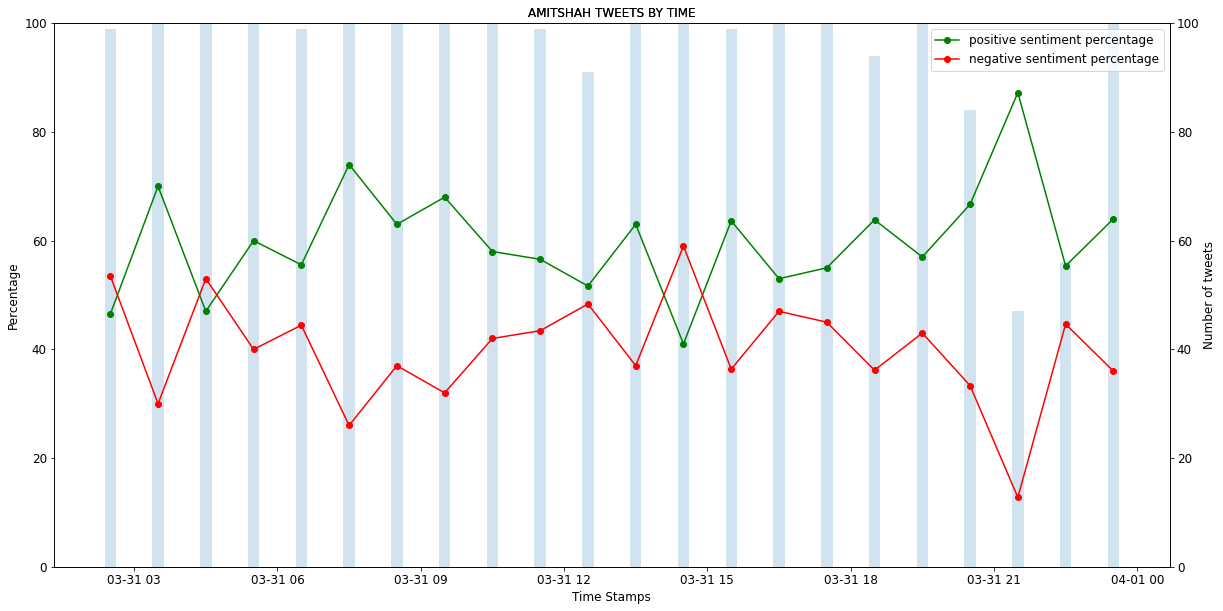

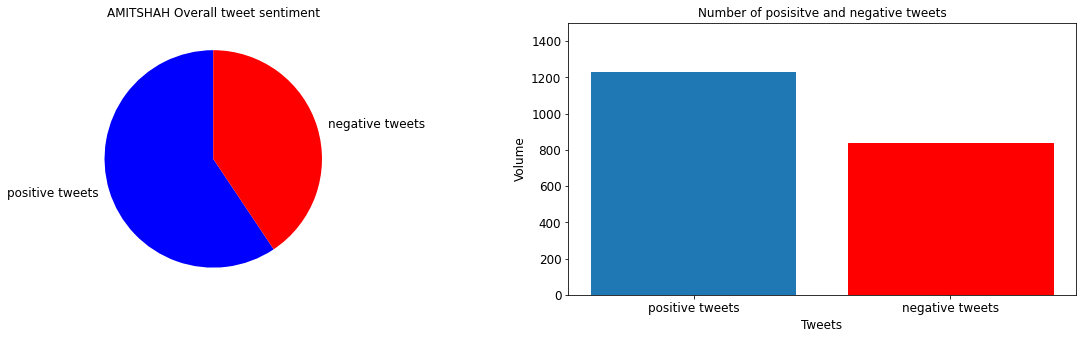

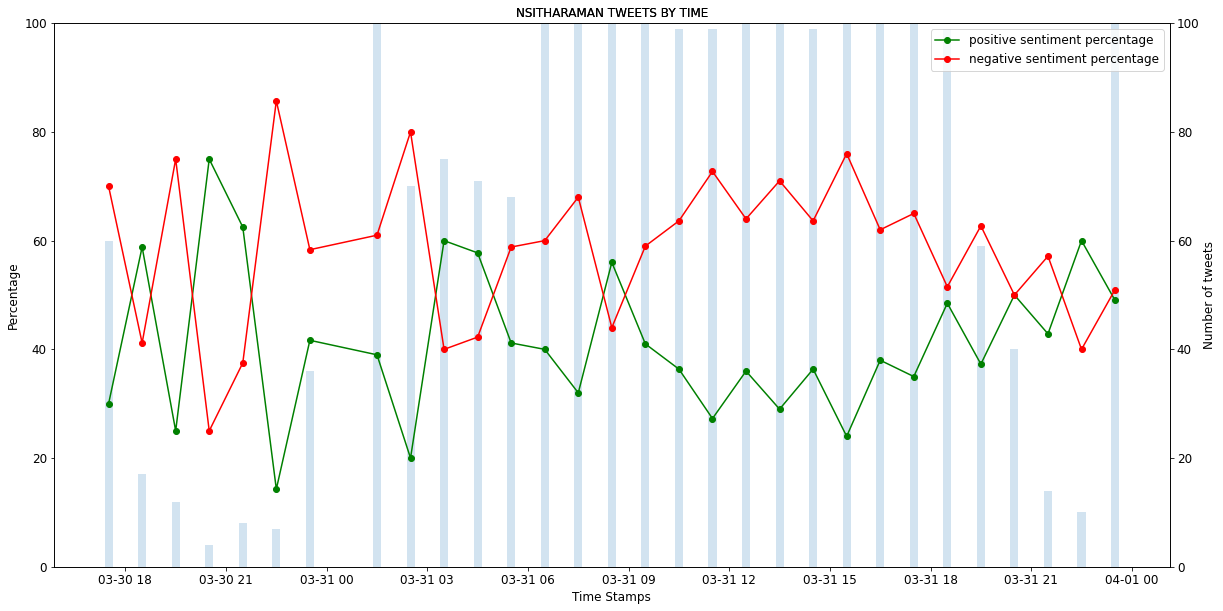

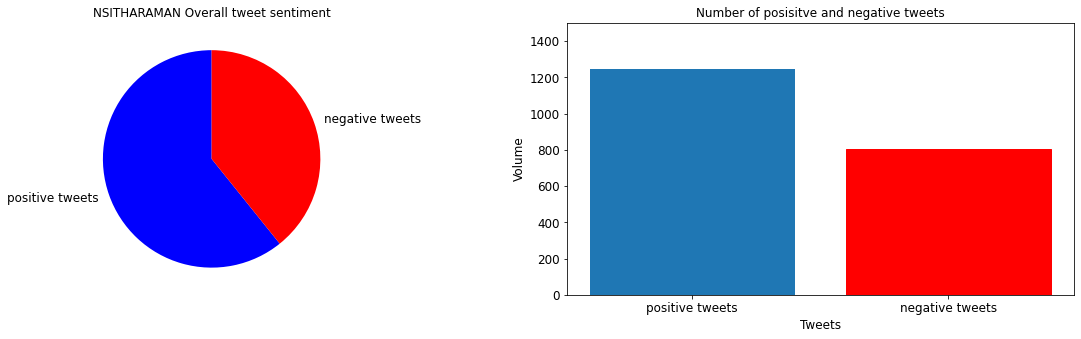

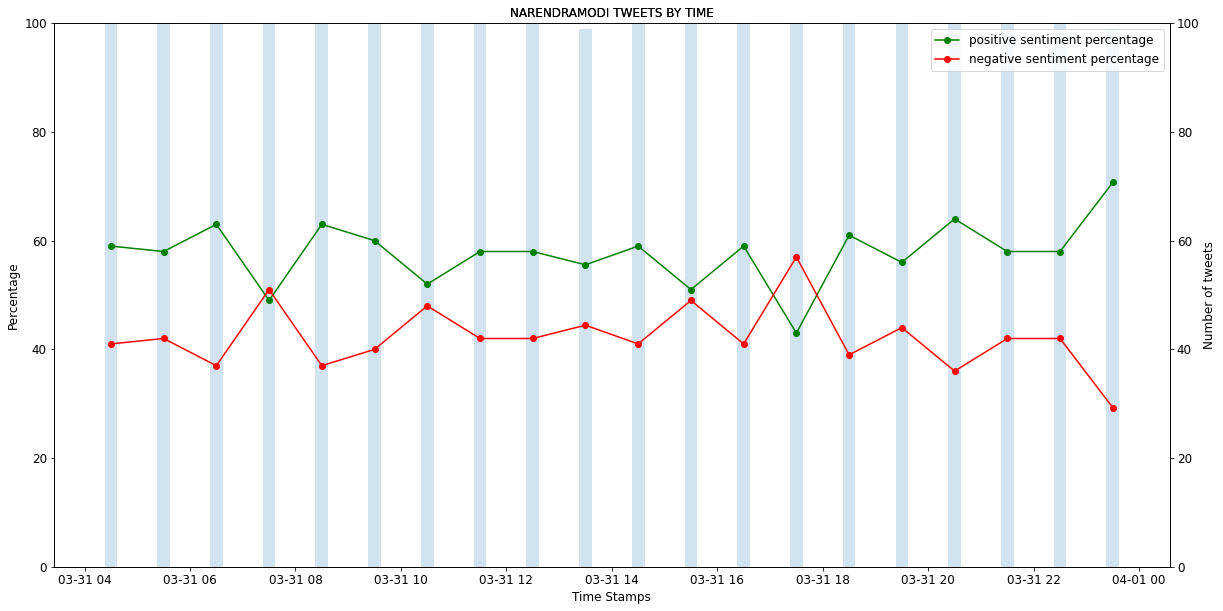

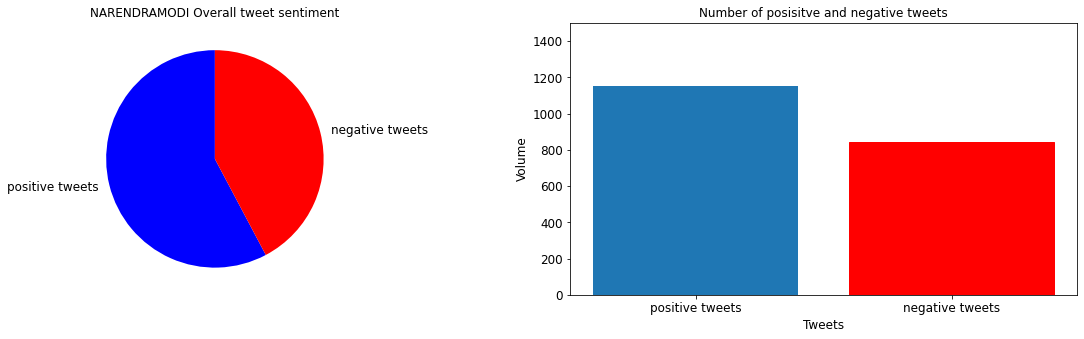

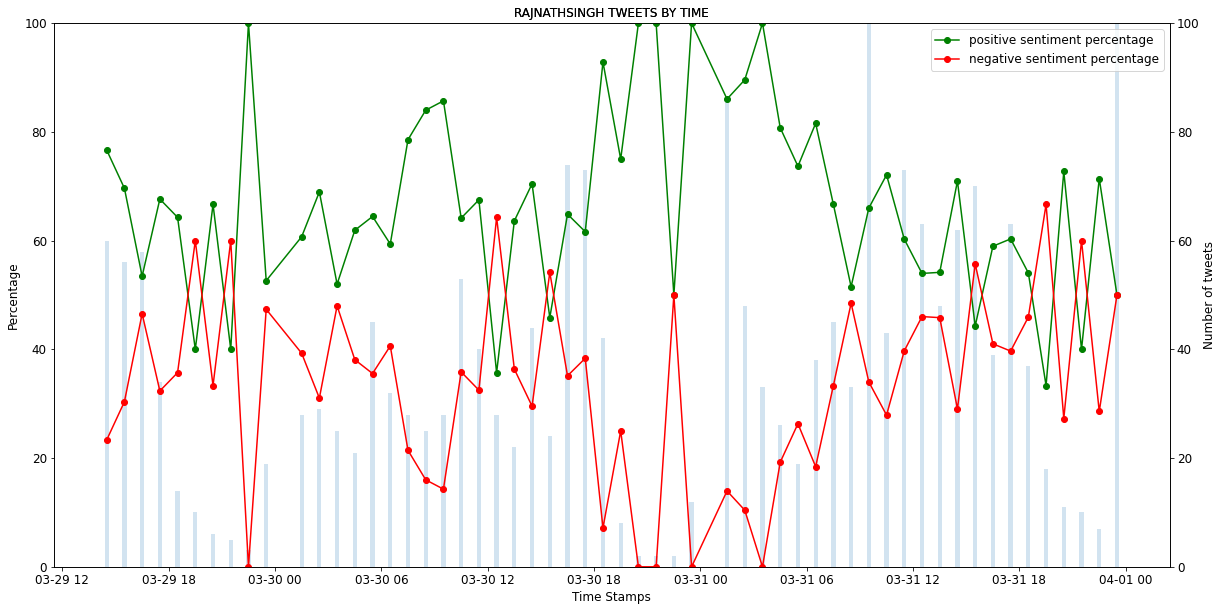

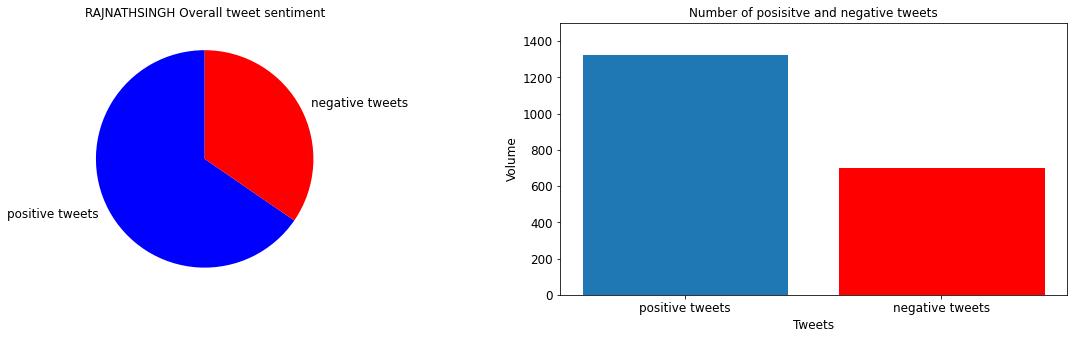

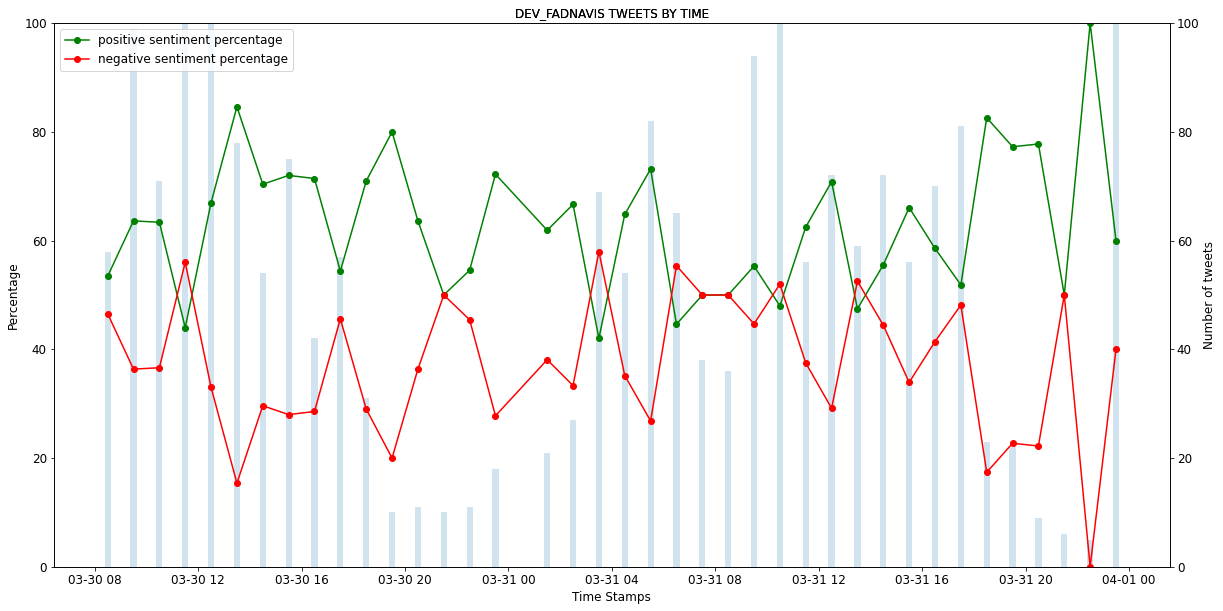

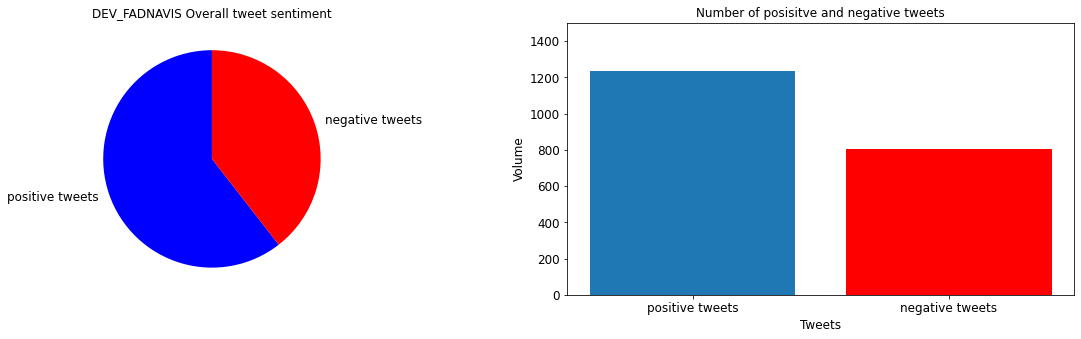

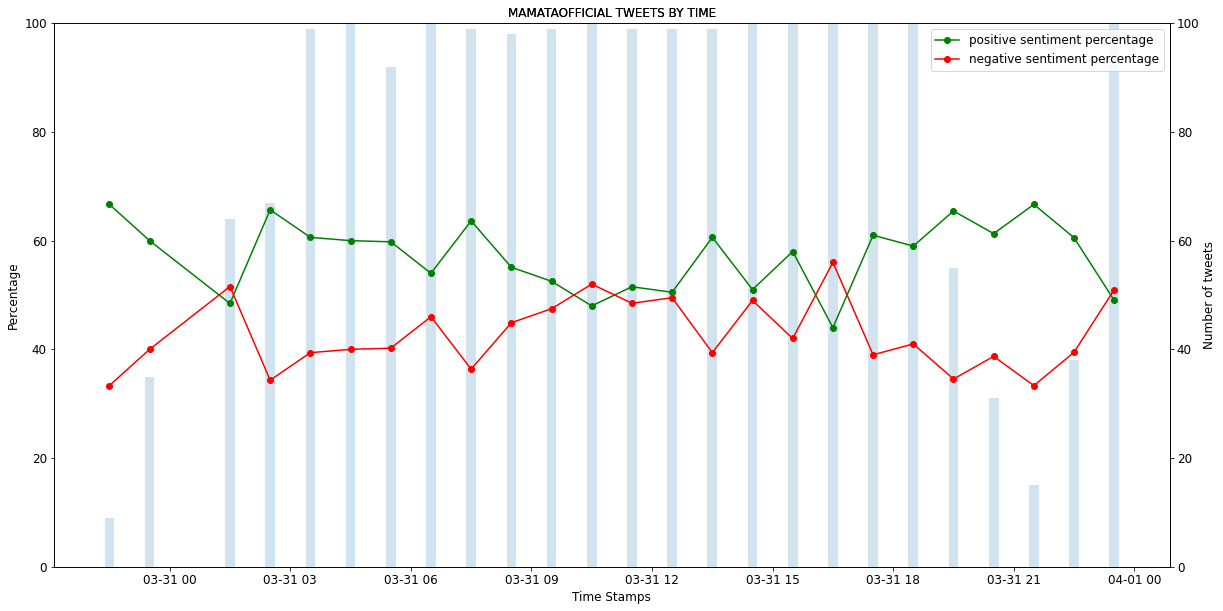

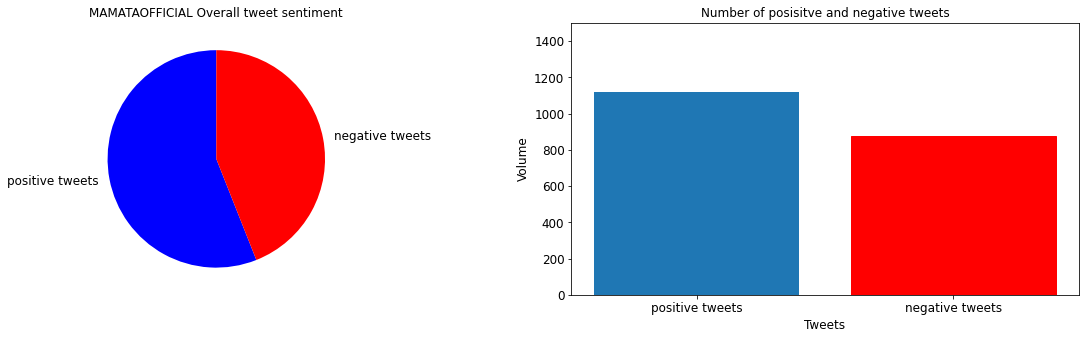

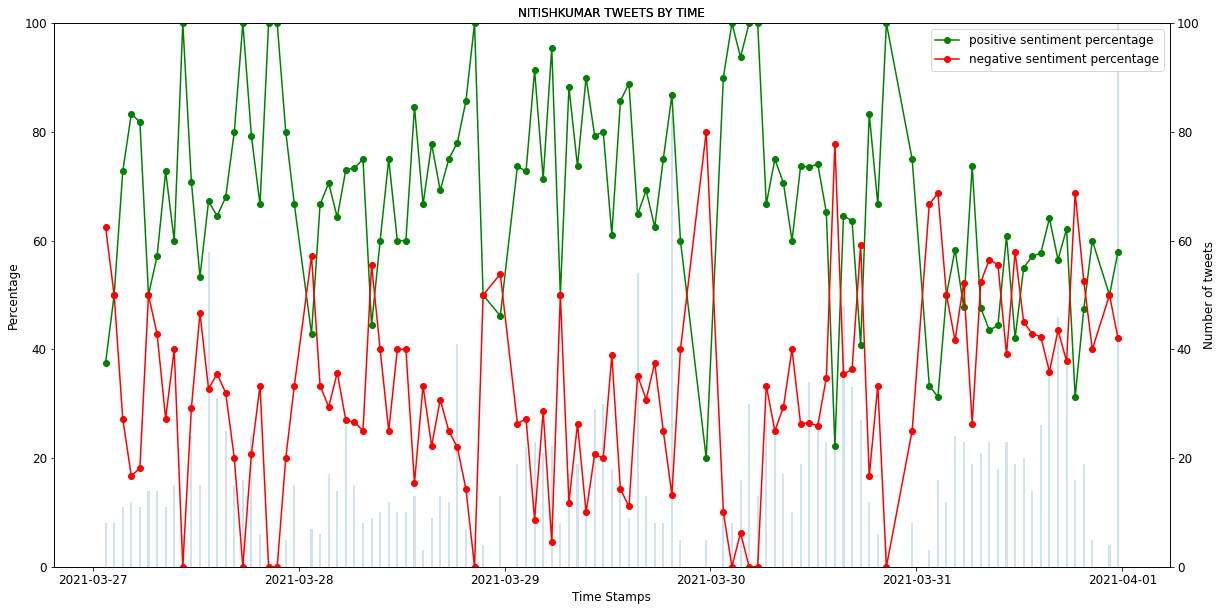

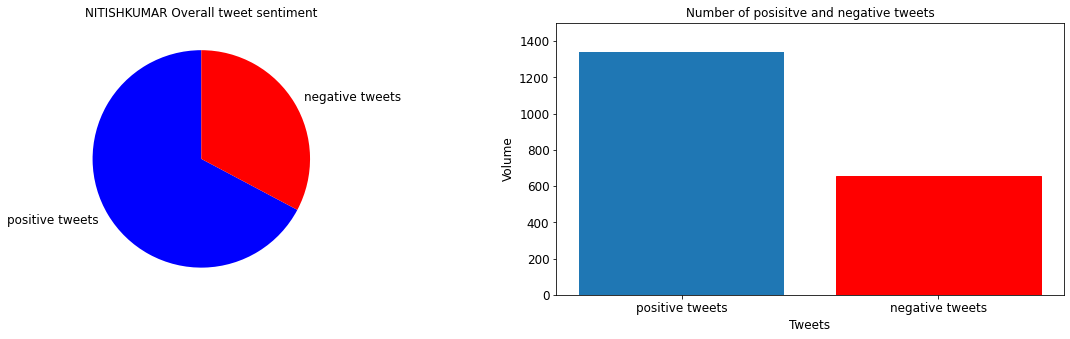

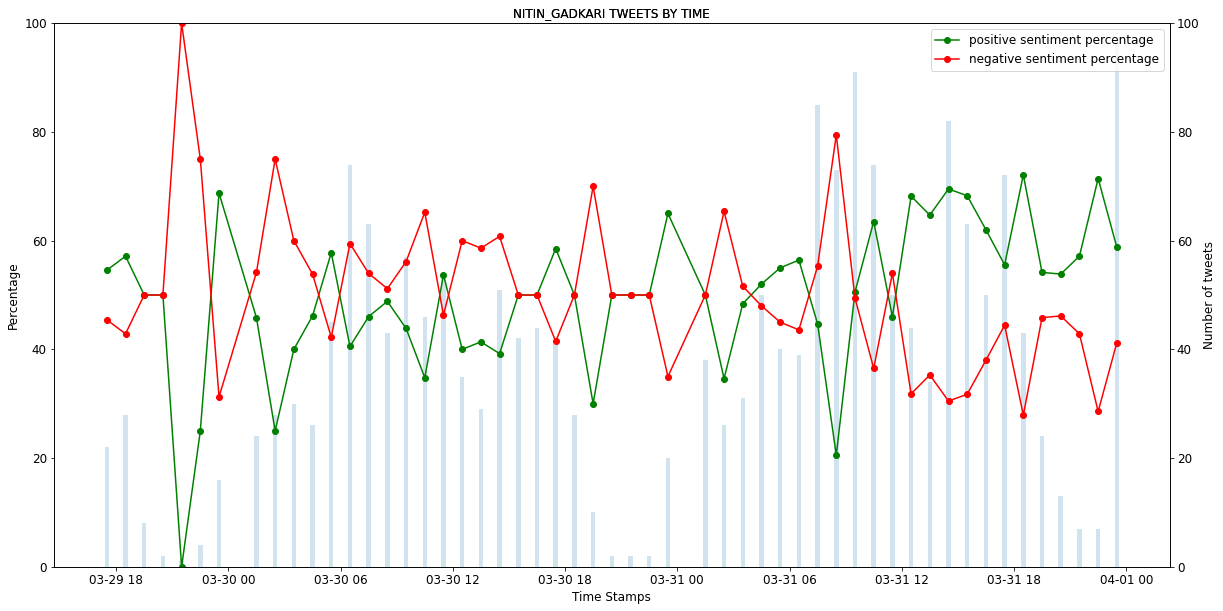

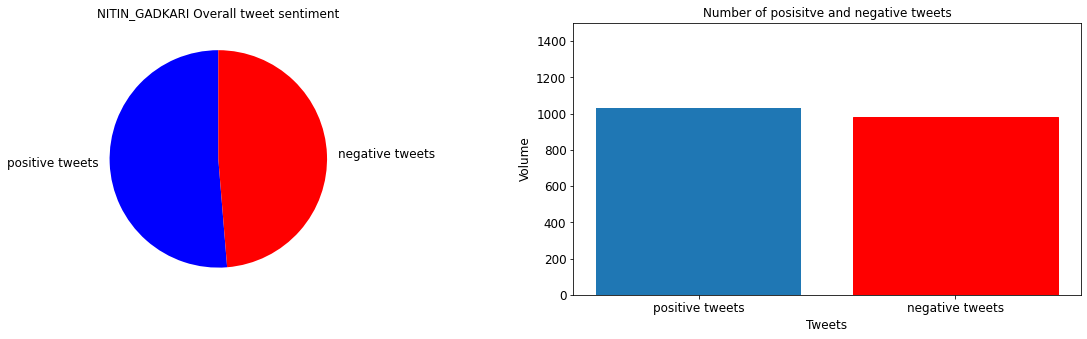

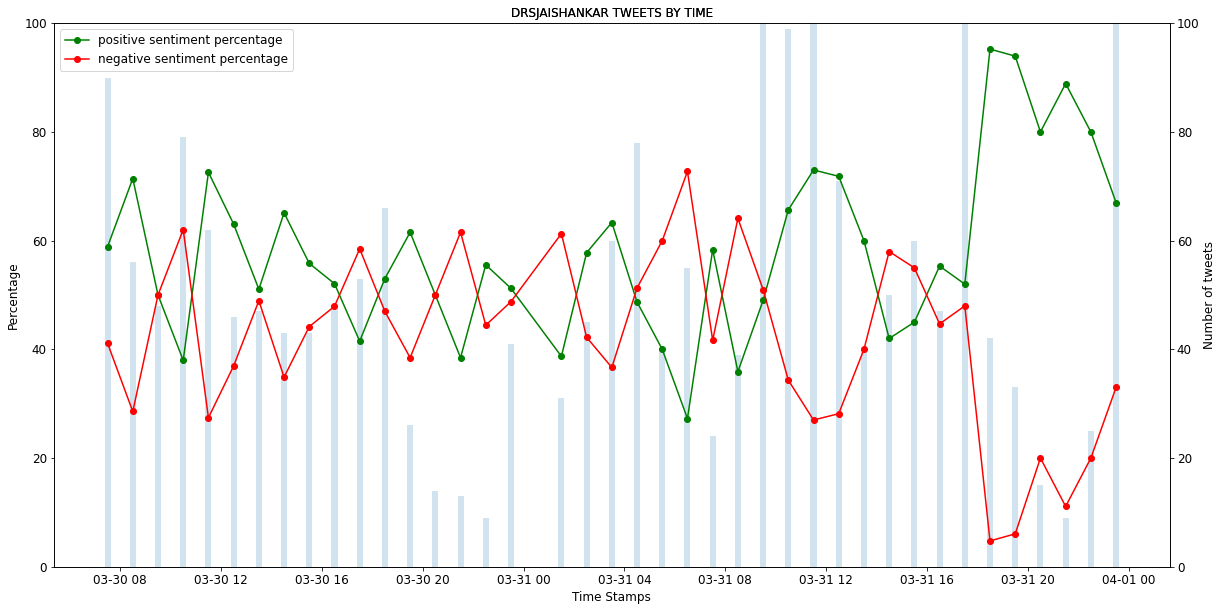

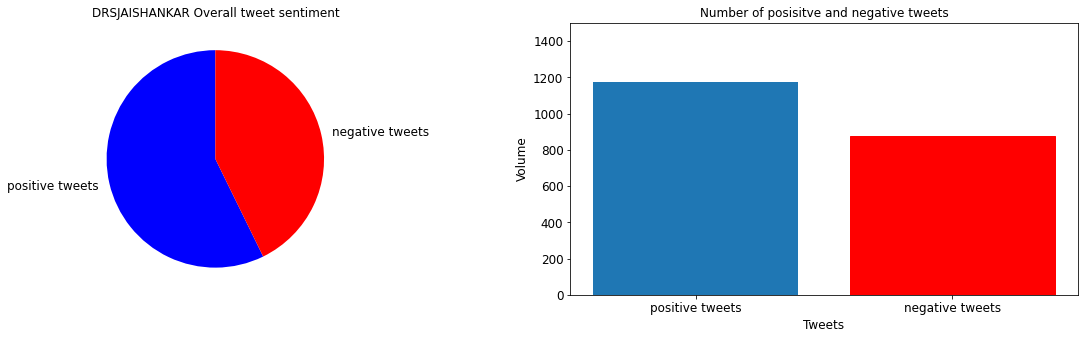

In [24]:
for p in politicians:
    draw_graphs(p)

---